<a href="https://colab.research.google.com/github/MarkLee7925/Optical-Interconnection-Network/blob/main/Optical_Interconnection_Network_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Interconnection Network DNN

## 1. Import Libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 2. Load and Summarize Data

In [62]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('optical_interconnection_network.csv', sep=';', decimal=',')
# Remove unnamed columsn identified by (;)
df = df.loc[:, ~df.columns.str.match('^Unnamed')]
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(640, 9) (640,)


In [63]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,UN,Client-Server,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,UN,Client-Server,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,UN,Client-Server,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,UN,Client-Server,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812
...,...,...,...,...,...,...,...,...,...,...
635,16,10,PS,Asynchronous,0.6,0.792340,532.737732,363.094043,1214.057768,0.961042
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
637,16,10,PS,Asynchronous,0.8,0.618230,905.326843,206.922631,1421.304936,0.962500
638,16,10,PS,Asynchronous,0.9,0.564482,1048.269897,154.713952,2371.043062,0.979375


#### Spatial Distribution:

- UN: Uniform
- HR: Hot Region
- BR: Bit Reverse
- PS: Perfect Shuffle

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    float64
 5   Processor Utilization   640 non-null    float64
 6   Channel Waiting Time    640 non-null    float64
 7   Input Waiting Time      640 non-null    float64
 8   Network Response Time   640 non-null    float64
 9   Channel Utilization     640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 50.1+ KB


In [65]:
df.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.000000,7.000000,0.550000,0.649013,377.459157,333.247102,1504.247529,26.347886
std,24.018772,2.237817,0.287453,0.194737,381.974899,233.721860,1202.606968,223.782214
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,0.529210,0.136979
25%,16.000000,5.500000,0.300000,0.492530,29.247560,137.730986,580.676198,0.587539
50%,40.000000,7.000000,0.550000,0.624787,265.614624,261.855556,1232.150369,0.773611
75%,64.000000,8.500000,0.800000,0.833106,664.965408,485.943680,2115.326618,0.905573
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,2895.323131


In [66]:
# Check for missing values
df.isnull().sum()

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64

## 3. Visualize Data

#### Pairwise relationships between features

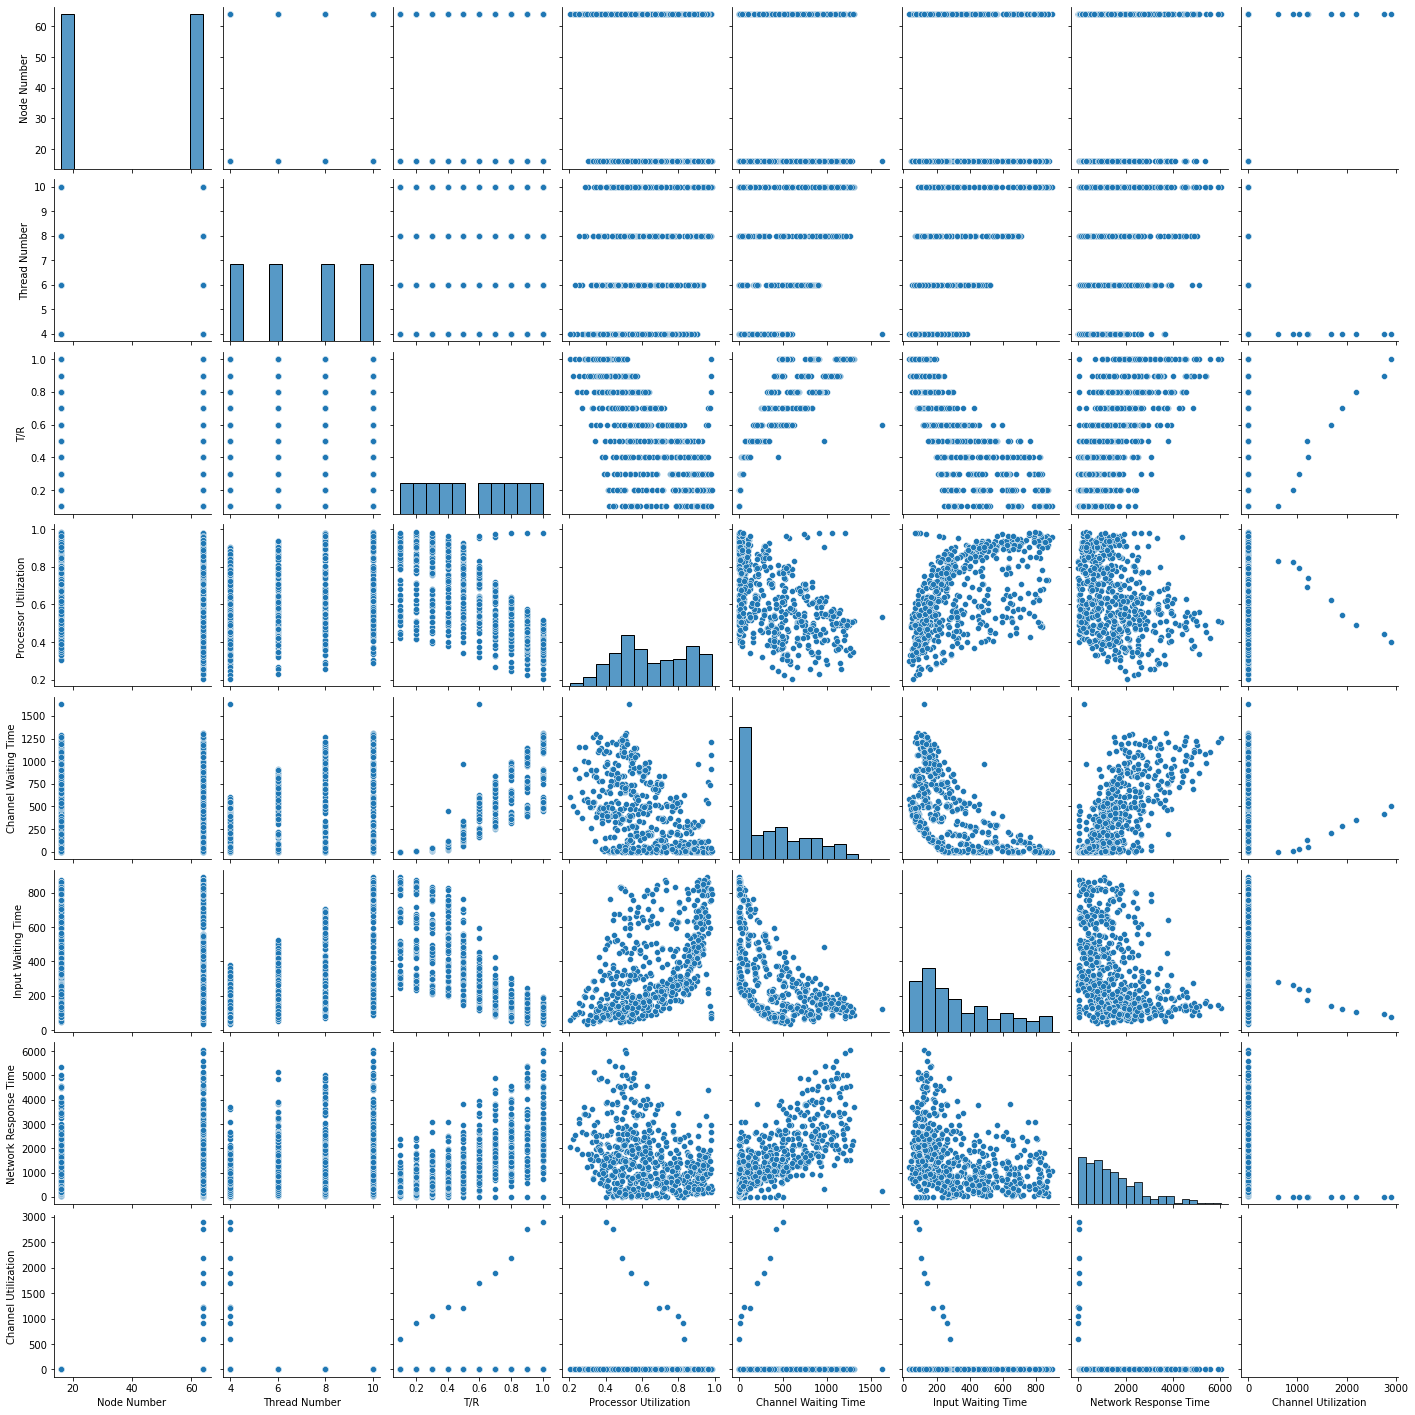

In [67]:
# Pairwise distributions
sns.pairplot(df)
plt.show()

#### Channel Utilization per Spatial Distribution

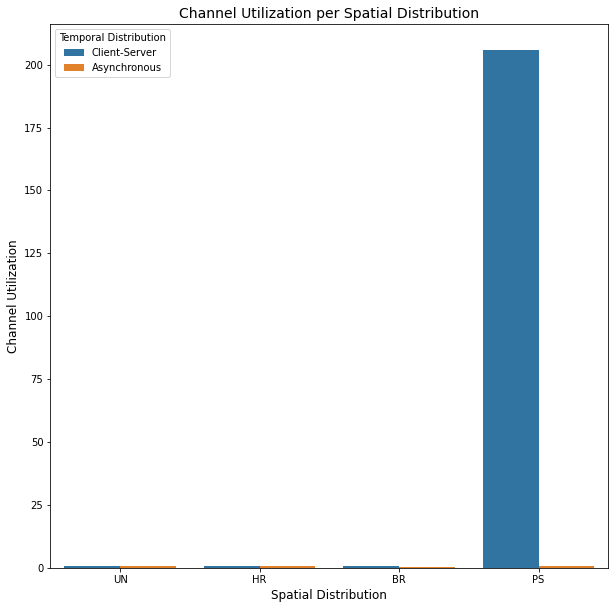

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Spatial Distribution'], y=df['Channel Utilization'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

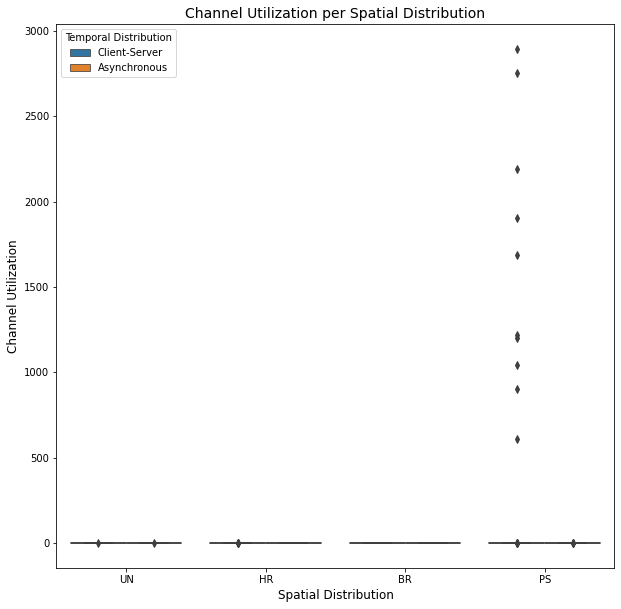

In [69]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Spatial Distribution'], y=df['Channel Utilization'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Channel Waiting Time per Spatial Distribution

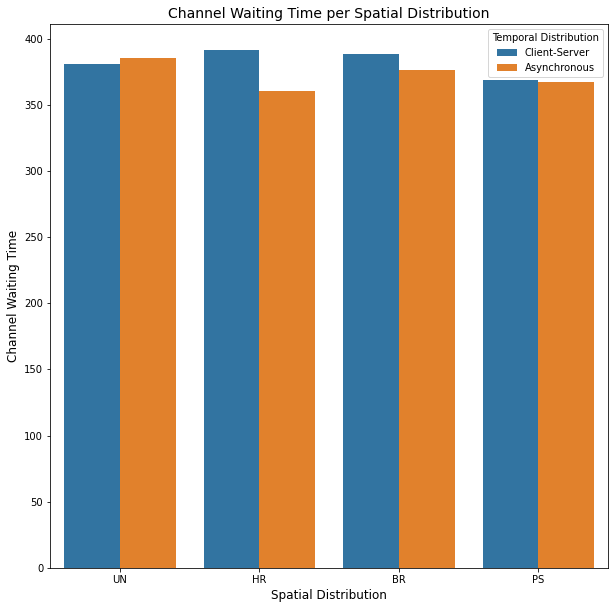

In [70]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df['Spatial Distribution'], y=df['Channel Waiting Time'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

#### Processor Utilization per Spatial Distribution

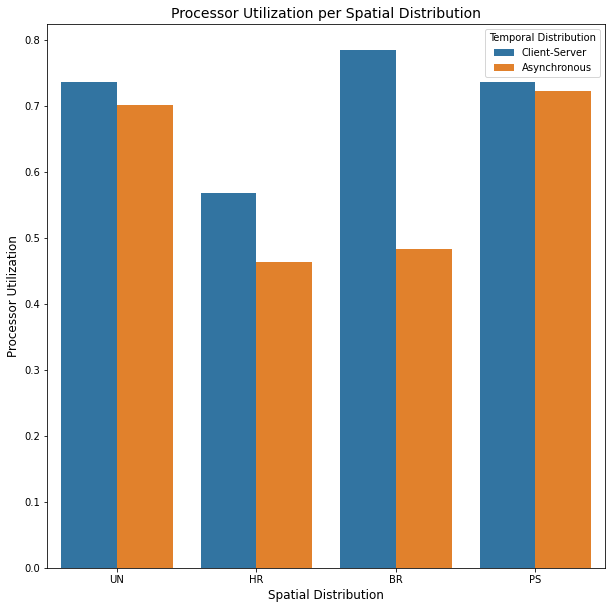

In [71]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df['Spatial Distribution'], y=df['Processor Utilization '], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.show()

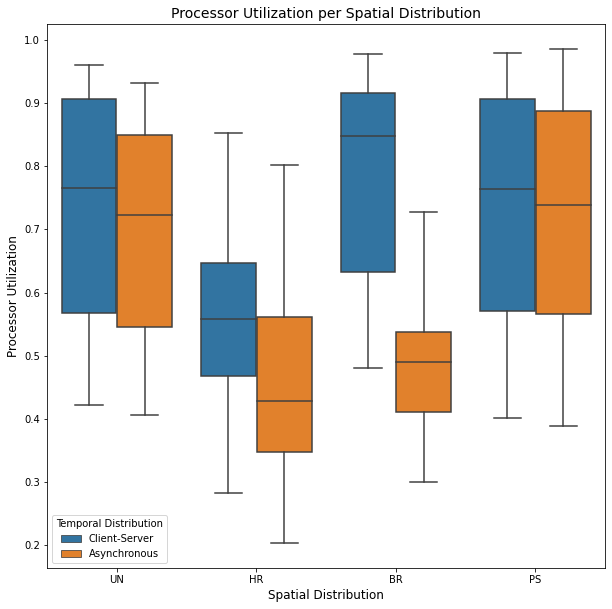

In [72]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Spatial Distribution'], y=df['Processor Utilization '], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Network Response Time per Spatial Distribution

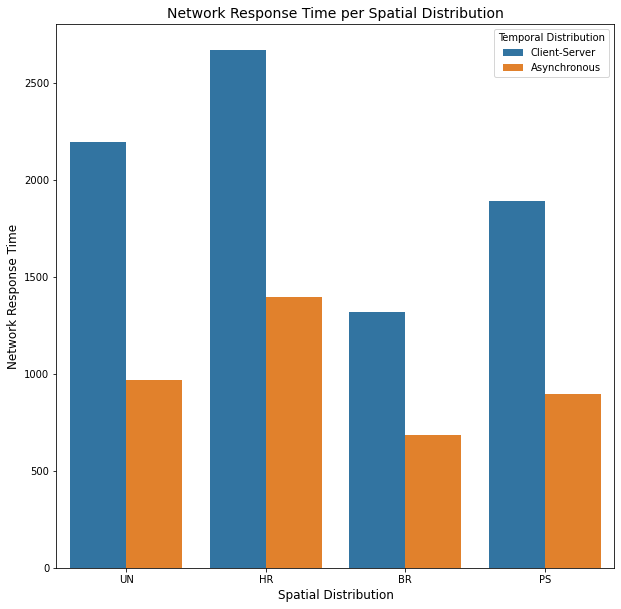

In [73]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df['Spatial Distribution'], y=df['Network Response Time'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

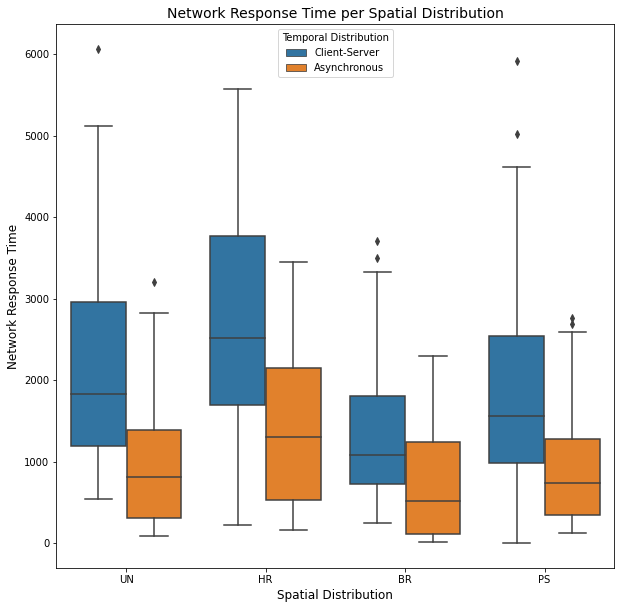

In [74]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Spatial Distribution'], y=df['Network Response Time'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

#### Correlation Map

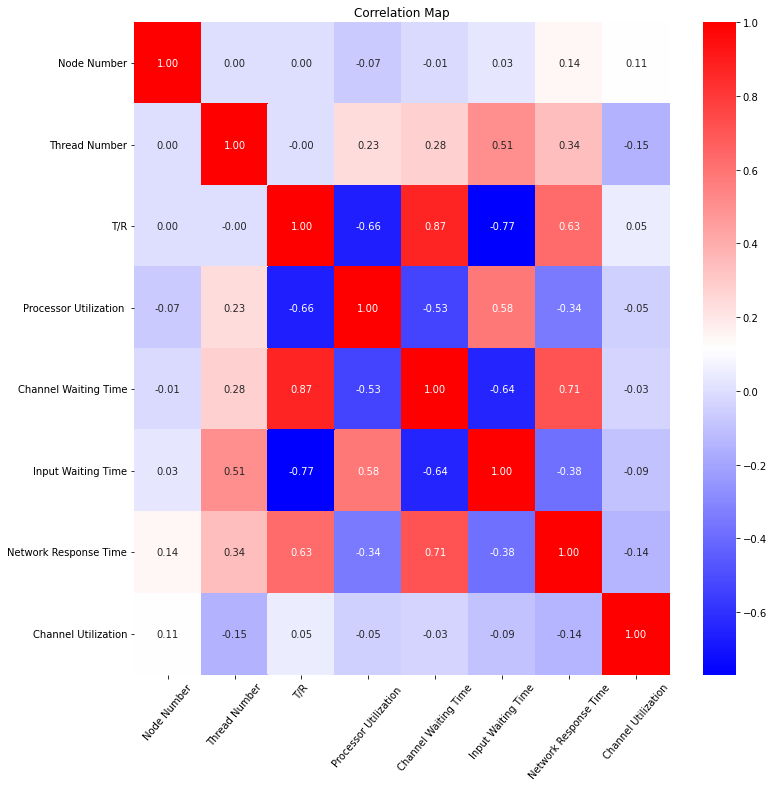

In [75]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='bwr', annot=True, fmt = ".2f")
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [76]:
# Label Encode the Spatial Distribution column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
# X[:, 3] = le.fit_transform(X[:, 3])

In [77]:
# One-Hot Encode the Temporal Distribution column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [78]:
X[:5, :]

array([[0.0, 1.0, 64, 4, 3, 0.1, 0.8395459999999999, 1.9746860000000002,
        308.49181400000003, 700.514102],
       [0.0, 1.0, 64, 4, 3, 0.2, 0.827412, 9.556436999999999, 291.037663,
        864.5992269999999],
       [0.0, 1.0, 64, 4, 3, 0.3, 0.802605, 27.027618, 264.928002,
        839.372851],
       [0.0, 1.0, 64, 4, 3, 0.4, 0.723403, 61.848511, 235.77688799999999,
        1256.053108],
       [0.0, 1.0, 64, 4, 3, 0.5, 0.72121, 121.08588400000001,
        189.68004399999998, 1343.875577]], dtype=object)

In [79]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [80]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Define DNN Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_48 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_49 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 21,401
Trainable params: 21,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
16/16 [==============================] - 0s 10ms/step - loss: 51827.5352 - val_loss: 45939.7461
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 51724.2500 - val_loss: 45789.6680
Epoch 3/150
16/16 [=============

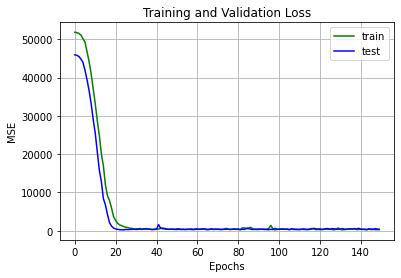

In [82]:
# Define model
reg = Sequential()

# Add layers
reg.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))
reg.add(Dense(units=100, activation='relu'))
reg.add(Dense(units=100, activation='relu'))

# reg.add(Dropout(0.00015))

# reg.add(Dense(units=50, activation='relu'))
# reg.add(Dropout(0.0002))

reg.add(Dense(units=1))

# Compile model
reg.compile(optimizer='adam', loss='mse')

# Summarize model
reg.summary()

# Train model
history = reg.fit(X_train, y_train, batch_size=32, epochs=150, 
                  validation_data=(X_test, y_test))

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [83]:
# Predict test set results
y_pred = reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

MAE: 3.067
MSE: 383.060
RMSE: 19.572
R^2 Score: 0.992


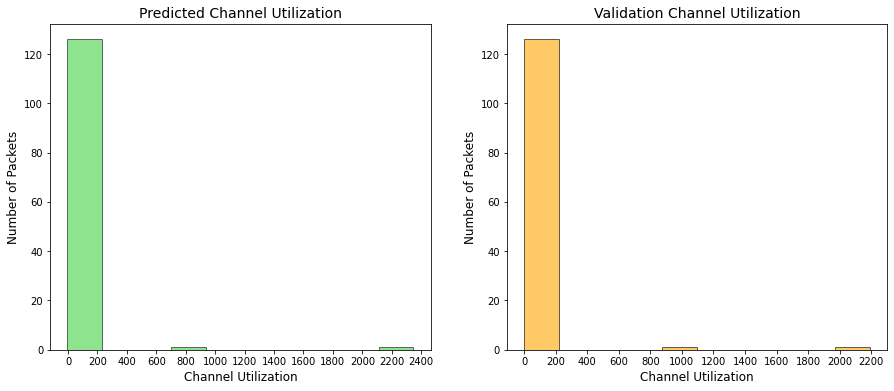

In [84]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 2600, 200))
plt.yticks(np.arange(0, 160, 20))
plt.hist(x=y_pred, facecolor='limegreen', alpha=0.55, edgecolor='black')
plt.xlabel('Channel Utilization', fontsize=12)
plt.ylabel('Number of Packets', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 2600, 200))
plt.yticks(np.arange(0, 160, 20))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization', fontsize=12)
plt.ylabel('Number of Packets', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "3">Sample Neural Network Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE</b></td>
      <td>2.709</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>254.053</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>15.939</td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>0.994</td>
    </tr>
  </tbody>
</table>

Note: These results will vary due to the random nature of Deep Learning.